In [92]:
import tensorflow;
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense;
from tensorflow.keras.datasets import mnist;
from tensorflow.keras.utils import to_categorical;
import numpy;

import matplotlib.pyplot as plt;

In [93]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data();

# Split the test and val by 50:50
test_val_images_split = numpy.array_split(test_images, 2);
test_val_labels_split = numpy.array_split(test_labels, 2);

test_images = test_val_images_split[0];
test_labels = test_val_labels_split[0];

val_images = test_val_images_split[1];
val_labels = test_val_labels_split[1];

# Data Pre-Processing

1. Reshape the image data to float32 array. Well. 
2. Perform One-Hot Encoding to all labels

In [94]:
# Recall step 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255;
test_images = test_images.reshape((5000, 28, 28, 1)).astype('float32') / 255;
val_images = val_images.reshape((5000, 28, 28, 1)).astype('float32') / 255;

# Recall step 2
train_labels = tensorflow.one_hot(train_labels, depth = 10);
test_labels = tensorflow.one_hot(test_labels, depth = 10);
val_labels = tensorflow.one_hot(val_labels, depth = 10);

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_42 (Dense)            (None, 64)              

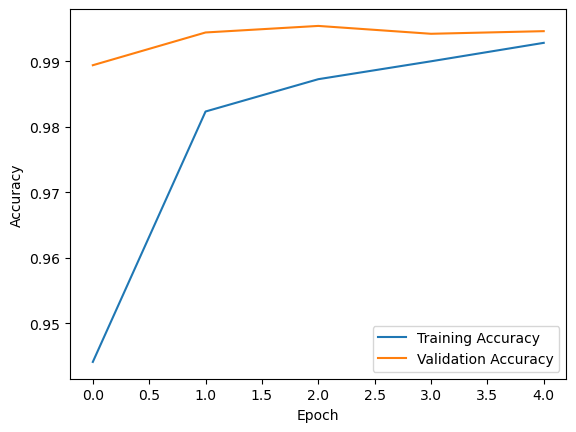

157/157 [==============================] - 1s 7ms/step - loss: 0.0524 - accuracy: 0.9836
Test accuracy: 0.9836000204086304


In [96]:
class CNNModel:
    def __init__(self):
        model = Sequential();

        # Input layer
        model.add(Input(shape = (28, 28, 1)));

        # Hidden layers
        for i in [self.hidden_layers()]:
            for j in i:
                model.add(j);
    
        # Output layer
        # Put 10 since MNIST consist of 10 different classes
        model.add(Dense(10, activation = "softmax"));
    
        self.model = model;

    def hidden_layers(self):
        return [
            # convolutional_1
            Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu"),
            MaxPooling2D((2, 2)),

            # convolutional_2
            Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"),
            MaxPooling2D((2, 2)),
            
            # Fully connected layers
            Flatten(),
            Dense(64, activation = "relu"),
        ];

    def fitting(self):
        model = self.model;

        model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"]);
        model.summary();

        history = model.fit(
            train_images, 
            train_labels, 
            epochs = 5, 
            batch_size = 64, 
            validation_data = (val_images, val_labels)
        );

        # Plot training history
        plt.plot(history.history['accuracy'], label='Training Accuracy');
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy');
        plt.xlabel('Epoch');
        plt.ylabel('Accuracy');
        plt.legend();
        plt.show();

        return model;

cnn = CNNModel();
model = cnn.fitting();

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')